In [68]:
import csv
import matplotlib.pyplot as plt

In [69]:
data = csv.reader(open('data/seoul.csv', 'rt', encoding='UTF-8'))

In [70]:
next(data)

['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)']

In [71]:
ls = list(data)

In [81]:
# print([i for i in ls])

In [73]:
'''
next()는 두가지 포맷으로 사용된다.
function 구조로 사용되면 header 만 리턴한다.
consumer 구조로 사용되면 data 에서 header 를 제거한다.

row[날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)] 최고기온은 -1 이다. 
data : [] = list()는 list 타입의 data 를 list()로 초기화 시키는 것이다.
단, 한 메소드 내에서만 사용하면 로컬에서 초기화한다. 예제는 다음과 같다.
data : [] = None
def save_highest_temperature(self):
    data = list()
그러나, 여러 메소드에서 사용하면 필드에서 초기화한다.
data : [] =list()
'''

'\nnext()는 두가지 포맷으로 사용된다.\nfunction 구조로 사용되면 header 만 리턴한다.\nconsumer 구조로 사용되면 data 에서 header 를 제거한다.\n\nrow[날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)] 최고기온은 -1 이다. \ndata : [] = list()는 list 타입의 data 를 list()로 초기화 시키는 것이다.\n단, 한 메소드 내에서만 사용하면 로컬에서 초기화한다. 예제는 다음과 같다.\ndata : [] = None\ndef save_highest_temperature(self):\n    data = list()\n그러나, 여러 메소드에서 사용하면 필드에서 초기화한다.\ndata : [] =list()\n'

In [82]:
# print([i[-1] for i in ls]) # show_highest_temperature

In [75]:
highest_temperature = []
[highest_temperature.append(float(i[-1])) for i in ls if i[-1] != '']
print(f'총 {len(highest_temperature)}개')

총 39463개


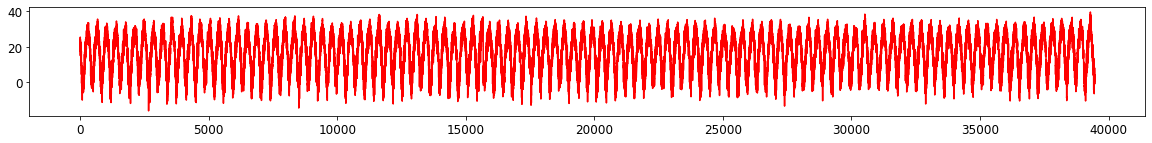

In [76]:
plt.figure(figsize=(20, 2))
plt.plot(highest_temperature, 'r')

In [77]:
high = [] # 최고기온
low = [] # 최저기온

In [78]:
        for i in ls:
            if i[-1] != '' and i[-2] != '':
                if 1983 <= int(i[0].split('-')[0]):
                    if i[0].split('-')[1] == '02' and i[0].split('-')[2] == '14':
                        high.append(float(i[-1]))
                        low.append(float(i[-2]))

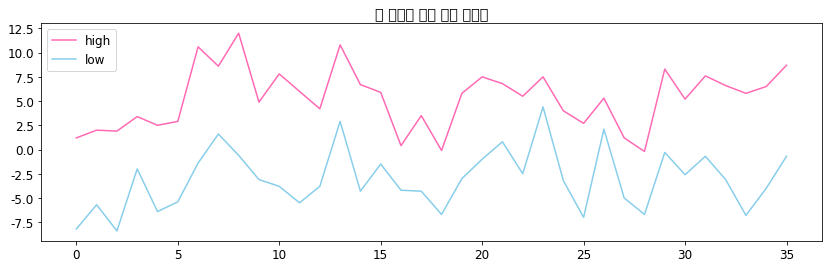

In [80]:
plt.rc('font')
plt.rcParams['axes.unicode_minus'] = False
plt.title('내 생일의 기온 변화 그래프')
plt.plot(high, 'hotpink', label='high')
plt.plot(low, 'skyblue', label='low')
plt.legend()